In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.circuit.library import RYGate

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import vector2latex
import qiskit.quantum_info as qi
from qiskit.circuit.library import CSwapGate
from qiskit.circuit.library import RYGate

In [112]:
x, y = 0.3, 0.1
theta = np.arccos(x)
U = RYGate(theta * 2)

In [113]:
qc = QuantumCircuit(1,1)
qc.append(U, [0])
state = qi.Statevector.from_instruction(qc)
qc.measure(0, 0)
qc.draw("mpl")
state.draw("latex")

<IPython.core.display.Latex object>

In [13]:
def run_experiment(circuit):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, aer_sim)
    qobj = assemble(transpiled_circuit)
    results = aer_sim.run(qobj, shots=8192).result()
    counts = results.get_counts()
    display(plot_histogram(counts))
    return counts

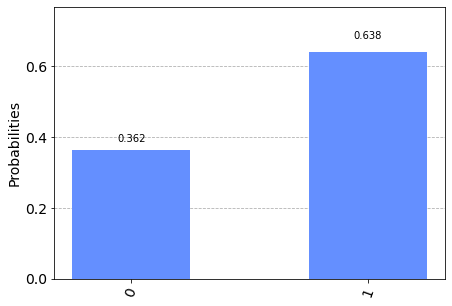

{'1': 5227, '0': 2965}

In [17]:
run_experiment(qc)

In [67]:
def gate_from_state(a, b):
    norm = math.sqrt(a ** 2 + b ** 2)
    x, y = a / norm, b / norm
    if y >= 0:
        theta = np.arccos(x)
    elif x <= 0 and y <= 0:
        theta = 2 * np.pi - np.arccos(x)
    elif x >= 0 and y <= 0:
        theta = 2 * np.pi - np.arccos(x)
    U = RYGate(theta * 2) 
    U = RYGate(theta * 2)
    return U

In [182]:
def run_experiment(circuit, verbose = False):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, aer_sim)
    qobj = assemble(transpiled_circuit)
    results = aer_sim.run(qobj, shots=50000).result()
    counts = results.get_counts()
    if verbose:
        display(plot_histogram(counts))
    return counts

def test_gate(gate):
    qc = QuantumCircuit(1,1)
    qc.append(gate, [0])
    n = qi.Statevector.from_instruction(qc)
    qc.measure(0, 0)
    display(qc.draw("mpl"))
    display(n.draw())
    run_experiment(qc)

In [123]:
v = [0.9, 0.3, 0.3, 0.1]

In [124]:
a, b, c, d = 0.3, 0.3, 0.9, 0.1

0.4242640687119285 0.9055385138137417


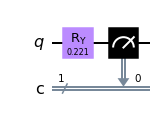

'Statevector([0.99388373+0.j, 0.11043153+0.j],\n            dims=(2,))'

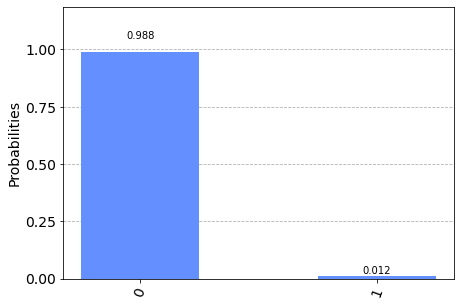

In [126]:
U_ab = gate_from_state(a, b)
U_ab_inverse = U_ab.inverse()
U_cd = gate_from_state(c, d)

qr = QuantumCircuit(1)
qr.append(U_ab_inverse,[0])
qr.append(U_cd,[0])

U_ab_cd = qr.to_gate(label ="ab->cd")
cU_ab_cd = U_ab_cd.control(1)

In [134]:
main = QuantumCircuit(2)
main.append(U_first, [0])
main.append(U_ab, [1])
main.append(cU_ab_cd, [0, 1])
state = qi.Statevector.from_instruction(main)
main.draw("mpl")
state.draw("latex")

<IPython.core.display.Latex object>

In [155]:
def create_gate_from_4(x, y, z, t):
    norm = math.sqrt(x ** 2 + y ** 2 + z ** 2 + t ** 2)
    a, c, b, d = x / norm,  y / norm, z / norm, t / norm
    print(a, b, c, d)
    ab_norm = math.sqrt(a ** 2 + b ** 2)
    cd_norm = math.sqrt(c ** 2 + d ** 2)
    U_first = gate_from_state(ab_norm, cd_norm)
    U_ab = gate_from_state(a, b)
    U_ab_inverse = U_ab.inverse()
    
    U_cd = gate_from_state(c, d)
    
    qr = QuantumCircuit(1)
    qr.append(U_ab_inverse,[0])
    qr.append(U_cd,[0])
    U_ab_cd = qr.to_gate(label ="ab->cd")
    cU_ab_cd = U_ab_cd.control(1)
    
    main = QuantumCircuit(2)
    main.append(U_first, [0])
    main.append(U_ab, [1])
    main.append(cU_ab_cd, [0, 1])
    
    return main.to_gate(label = f"U")


0.4745789978762495 0.4745789978762495 0.5694947974514994 0.4745789978762495


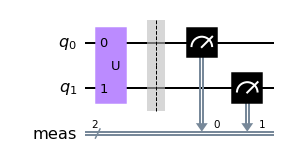

<IPython.core.display.Latex object>

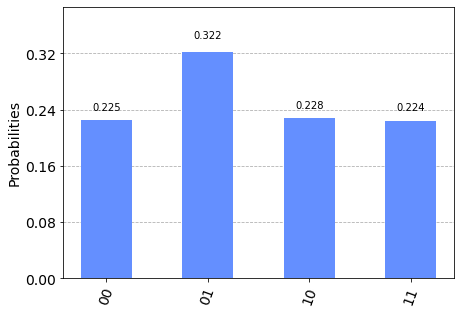

{'01': 16109, '10': 11402, '11': 11216, '00': 11273}

In [156]:
g = create_gate_from_4(0.5, 0.6, 0.5, 0.5)
test = QuantumCircuit(2)
test.append(g, [0, 1])
state = qi.Statevector.from_instruction(test)
test.measure_all()
display(test.draw("mpl"))
display(state.draw("latex"))
run_experiment(test)

0.9 0.3 0.1 0.3
0.3 0.1 0.3 0.9


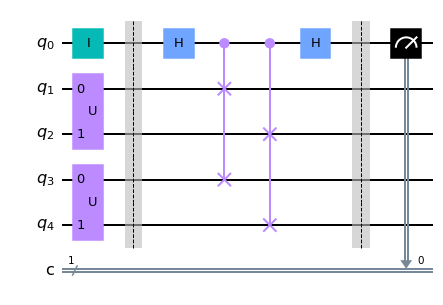

0.602262401283693


In [191]:
g9133 = create_gate_from_4(0.9, 0.1, 0.3, 0.3)
g3319 = create_gate_from_4(0.3, 0.3, 0.1, 0.9)

qc = QuantumCircuit(5, 1)
qc.i(0)
qc.append(g9133, [1, 2])
qc.append(g3319, [3, 4])
qc.barrier()
qc.h(0)
qc.append(CSwapGate(), [0, 1, 3])
qc.append(CSwapGate(), [0, 2, 4])
qc.h(0)

qc.barrier()
qc.measure(0, 0)

display(qc.draw("mpl"))

c = run_experiment(qc)
p = c['1'] / (c['0'] + c['1'])
squared = 1 - 2 * p
print(math.sqrt(squared))

0.6


In [ ]:
def get_sim_score(v1, v2):
    g1 = create_gate_from_4(v1[0], v1[1], v1[2], v1[3])
    g2 = create_gate_from_4(v2[0], v2[1], v2[2], v2[3])
    qc = QuantumCircuit(5, 1)
    qc.i(0)
    qc.append(g1, [1, 2])
    qc.append(g2, [3, 4])
    qc.barrier()
    qc.h(0)
    qc.append(CSwapGate(), [0, 1, 3])
    qc.append(CSwapGate(), [0, 2, 4])
    qc.h(0)

    qc.barrier()
    qc.measure(0, 0)

    display(qc.draw("mpl"))

    c = run_experiment(qc)
    p = c['1'] / (c['0'] + c['1'])
    return 1 - 2 * p

# Trying my method

In [192]:
trained_vectors = [
    [
        -0.7315618317226763,
        -0.338911644906983,
        0.585984871948432,
        0.0811043350295504
    ],
    [
        -0.7674061906824132,
        -0.2832719124528914,
        0.5737421791121151,
        0.04080041697422531
    ],
    [
        -0.8007992470212897,
        -0.22594083432086054,
        0.5546812509824584,
        0.0001231465139642847
    ],
    [
        -0.8303286093725792,
        -0.16979801715034976,
        0.5293057023825448,
        -0.03947793376722015
    ],
    [
        -0.8541045709048528,
        -0.1180098759192632,
        0.5006837646942452,
        -0.07677772409074828
    ],
    [
        -0.8541045709048528,
        -0.07677772409074828,
        0.5006837646942452,
        -0.1180098759192632
    ],
    [
        -0.8303286093725792,
        -0.03947793376722015,
        0.5293057023825448,
        -0.16979801715034976
    ],
    [
        -0.8007992470212897,
        0.0001231465139642847,
        0.5546812509824584,
        -0.22594083432086054
    ],
    [
        -0.7674061906824132,
        0.04080041697422531,
        0.5737421791121151,
        -0.2832719124528914
    ],
    [
        -0.6933431659551371,
        -0.3969515571566133,
        0.5943411274086271,
        0.09199641169572378
    ],
    [
        -0.7356558356292068,
        -0.33472280423243794,
        0.5870063597800894,
        0.046847298846301365
    ],
    [
        -0.7755590609371048,
        -0.2683648343153208,
        0.571391668000918,
        0.00014296991045889933
    ],
    [
        -0.8105349223315016,
        -0.20196849789316132,
        0.5478145519118587,
        -0.04627183002060956
    ],
    [
        -0.8369006638821471,
        -0.1405361981710086,
        0.5211250800151105,
        -0.09096981244624543
    ],
    [
        -0.8369006638821471,
        -0.09096981244624543,
        0.5211250800151105,
        -0.1405361981710086
    ],
    [
        -0.8105349223315017,
        -0.046271830020609576,
        0.5478145519118588,
        -0.20196849789316138
    ],
    [
        -0.7755590609371048,
        0.00014296991045889933,
        0.571391668000918,
        -0.2683648343153208
    ],
    [
        -0.7356558356292068,
        0.046847298846301365,
        0.5870063597800894,
        -0.33472280423243794
    ],
    [
        -0.6337469132698182,
        -0.4735631413413888,
        0.6024743255492198,
        0.10548690979389905
    ],
    [
        -0.6819895446997097,
        -0.40647919364179363,
        0.6055199088138389,
        0.05486862570431295
    ],
    [
        -0.727763928464471,
        -0.33128982983001437,
        0.6005053569218971,
        0.00017142130987142542
    ],
    [
        -0.7657769235736336,
        -0.2536093442192608,
        0.5882325860132994,
        -0.057012530191916176
    ],
    [
        -0.7889987310483271,
        -0.18048095456186564,
        0.5757060042708421,
        -0.11606129454330796
    ],
    [
        -0.7889987310483271,
        -0.11606129454330785,
        0.5757060042708423,
        -0.18048095456186553
    ],
    [
        -0.7657769235736336,
        -0.057012530191916176,
        0.5882325860132994,
        -0.2536093442192608
    ],
    [
        -0.7277639284644709,
        0.0001714213098714254,
        0.6005053569218971,
        -0.3312898298300143
    ],
    [
        -0.6819895446997098,
        0.05486862570431296,
        0.605519908813839,
        -0.4064791936417937
    ],
    [
        -0.5451504945501985,
        -0.5705503498020282,
        0.6021958627839898,
        0.12100983215550383
    ],
    [
        -0.5974187627904992,
        -0.5029369920401633,
        0.6212401954916449,
        0.06485231999678084
    ],
    [
        -0.6487406908532012,
        -0.4206056468758384,
        0.6342131833147623,
        0.00020965978278944555
    ],
    [
        -0.6910356852014252,
        -0.32930060504262165,
        0.6393837442672075,
        -0.07224417529189774
    ],
    [
        -0.7153620030237609,
        -0.2375450735459334,
        0.6394425995211123,
        -0.1514684936928216
    ],
    [
        -0.7153620030237609,
        -0.15146849369282162,
        0.6394425995211124,
        -0.23754507354593343
    ],
    [
        -0.6910356852014252,
        -0.07224417529189774,
        0.6393837442672075,
        -0.32930060504262165
    ],
    [
        -0.6487406908532012,
        0.00020965978278944555,
        0.6342131833147623,
        -0.4206056468758384
    ],
    [
        -0.5974187627904992,
        0.06485231999678084,
        0.6212401954916449,
        -0.5029369920401633
    ],
    [
        -0.42188021738454706,
        -0.6833179573214097,
        0.5800706074277941,
        0.13642485763237291
    ],
    [
        -0.47286232392774014,
        -0.6230084601429742,
        0.61847568869913,
        0.07582548178596775
    ],
    [
        -0.5273336367657914,
        -0.5391666363075683,
        0.6566722989006271,
        0.0002562902888515295
    ],
    [
        -0.5751187821614137,
        -0.4341402266829445,
        0.6871930583006893,
        -0.09233824020523307
    ],
    [
        -0.60345303148956,
        -0.3171658836446284,
        0.7037176831379497,
        -0.20007914303329657
    ],
    [
        -0.60345303148956,
        -0.2000791430332966,
        0.7037176831379498,
        -0.31716588364462844
    ],
    [
        -0.5751187821614137,
        -0.09233824020523307,
        0.6871930583006893,
        -0.4341402266829445
    ],
    [
        -0.5273336367657914,
        0.0002562902888515295,
        0.6566722989006271,
        -0.5391666363075683
    ],
    [
        -0.4728623239277401,
        0.07582548178596774,
        0.6184756886991299,
        -0.6230084601429741
    ],
    [
        -0.2673733017271653,
        -0.796659143417819,
        0.5215576239564667,
        0.14772735571039572
    ],
    [
        -0.3067703706738522,
        -0.7529391369937455,
        0.575939891205554,
        0.08525161217170958
    ],
    [
        -0.35507939286721246,
        -0.6788980097979246,
        0.6426632279055139,
        0.0003042228366993587
    ],
    [
        -0.40317497882402403,
        -0.567698333431235,
        0.7082731278122268,
        -0.1162657089976707
    ],
    [
        -0.43450244264892596,
        -0.42280998067234166,
        0.7504094084713456,
        -0.2632965386283229
    ],
    [
        -0.43450244264892596,
        -0.2632965386283229,
        0.7504094084713456,
        -0.42280998067234166
    ],
    [
        -0.4031749788240238,
        -0.11626570899767055,
        0.7082731278122271,
        -0.5676983334312349
    ],
    [
        -0.35507939286721246,
        0.0003042228366993587,
        0.6426632279055139,
        -0.6788980097979246
    ],
    [
        -0.3067703706738522,
        0.08525161217170958,
        0.575939891205554,
        -0.7529391369937455
    ],
    [
        -0.10105528837295824,
        -0.888240992379983,
        0.42201322875473846,
        0.15073354936337835
    ],
    [
        -0.11791670737879666,
        -0.8647586596086805,
        0.4798469386149833,
        0.0896383079635596
    ],
    [
        -0.14267910764001163,
        -0.8115272830207183,
        0.566626884202846,
        0.00033949173085781186
    ],
    [
        -0.17149633705925368,
        -0.710636243487846,
        0.6679091551057106,
        -0.13957971322050178
    ],
    [
        -0.19296189651066184,
        -0.545817449705742,
        0.743294423087229,
        -0.33520503978781685
    ],
    [
        -0.19296189651066184,
        -0.33520503978781685,
        0.743294423087229,
        -0.545817449705742
    ],
    [
        -0.17149633705925368,
        -0.13957971322050178,
        0.6679091551057106,
        -0.710636243487846
    ],
    [
        -0.14267910764001163,
        0.00033949173085781186,
        0.566626884202846,
        -0.8115272830207183
    ],
    [
        -0.11791670737879666,
        0.0896383079635596,
        0.4798469386149833,
        -0.8647586596086805
    ],
    [
        0.04839980482325177,
        -0.9432866717518608,
        0.294929064650745,
        0.1445149148448188
    ],
    [
        0.05685955614863086,
        -0.9338945778917627,
        0.34198496347133,
        0.08748824503017803
    ],
    [
        0.07225322000341089,
        -0.9002678387545532,
        0.4292984586868725,
        0.00035223915187913775
    ],
    [
        0.09206203142374438,
        -0.8209128769210738,
        0.5417204460143789,
        -0.15545285216193996
    ],
    [
        0.10867639749569218,
        -0.6530662050731856,
        0.6360264684282873,
        -0.39643953369625856
    ],
    [
        0.10867639749569218,
        -0.39643953369625856,
        0.6360264684282873,
        -0.6530662050731856
    ],
    [
        0.09206203142374436,
        -0.15545285216193994,
        0.5417204460143787,
        -0.8209128769210737
    ],
    [
        0.07225322000341089,
        0.00035223915187913775,
        0.4292984586868725,
        -0.9002678387545532
    ],
    [
        0.056859556148630856,
        0.08748824503017802,
        0.34198496347132995,
        -0.9338945778917626
    ],
    [
        0.1670037616450965,
        -0.9621603574183143,
        0.1670037616450965,
        0.13589309697492755
    ],
    [
        0.1974759989981741,
        -0.9565754598895029,
        0.1974759989981741,
        0.08348562257378354
    ],
    [
        0.2608229616732986,
        -0.9294851484771769,
        0.2608229616732986,
        0.0003522616900665483
    ],
    [
        0.34077311749192435,
        -0.8613627901034228,
        0.34077311749192435,
        -0.1606284800865557
    ],
    [
        0.41079359677168714,
        -0.6966504947424791,
        0.41079359677168714,
        -0.42092199975508554
    ],
    [
        0.41079359677168714,
        -0.42092199975508554,
        0.41079359677168714,
        -0.6966504947424791
    ],
    [
        0.34077311749192435,
        -0.1606284800865557,
        0.34077311749192435,
        -0.8613627901034228
    ],
    [
        0.2608229616732986,
        0.0003522616900665483,
        0.2608229616732986,
        -0.9294851484771769
    ],
    [
        0.1974759989981741,
        0.08348562257378354,
        0.1974759989981741,
        -0.9565754598895029
    ],
    [
        0.294929064650745,
        -0.9432866717518608,
        0.04839980482325177,
        0.1445149148448188
    ],
    [
        0.34198496347133,
        -0.9338945778917627,
        0.05685955614863086,
        0.08748824503017803
    ],
    [
        0.4292984586868725,
        -0.9002678387545532,
        0.07225322000341089,
        0.00035223915187913775
    ],
    [
        0.5417204460143787,
        -0.8209128769210737,
        0.09206203142374436,
        -0.15545285216193994
    ],
    [
        0.6360264684282873,
        -0.6530662050731856,
        0.10867639749569218,
        -0.39643953369625856
    ],
    [
        0.6360264684282873,
        -0.39643953369625856,
        0.10867639749569218,
        -0.6530662050731856
    ],
    [
        0.5417204460143787,
        -0.15545285216193994,
        0.09206203142374436,
        -0.8209128769210737
    ],
    [
        0.4292984586868725,
        0.00035223915187913775,
        0.07225322000341089,
        -0.9002678387545532
    ],
    [
        0.34198496347132995,
        0.08748824503017802,
        0.056859556148630856,
        -0.9338945778917626
    ],
    [
        0.42201322875473846,
        -0.888240992379983,
        -0.10105528837295824,
        0.15073354936337835
    ],
    [
        0.4798469386149833,
        -0.8647586596086805,
        -0.11791670737879666,
        0.0896383079635596
    ],
    [
        0.5666268842028461,
        -0.8115272830207184,
        -0.14267910764001165,
        0.0003394917308578119
    ],
    [
        0.6679091551057106,
        -0.710636243487846,
        -0.17149633705925368,
        -0.13957971322050178
    ],
    [
        0.743294423087229,
        -0.545817449705742,
        -0.19296189651066184,
        -0.33520503978781685
    ],
    [
        0.743294423087229,
        -0.33520503978781685,
        -0.19296189651066184,
        -0.545817449705742
    ],
    [
        0.6679091551057106,
        -0.13957971322050178,
        -0.17149633705925368,
        -0.710636243487846
    ],
    [
        0.566626884202846,
        0.00033949173085781186,
        -0.14267910764001163,
        -0.8115272830207183
    ],
    [
        0.4798469386149833,
        0.0896383079635596,
        -0.11791670737879666,
        -0.8647586596086805
    ],
    [
        0.5215576239564668,
        -0.7966591434178191,
        -0.2673733017271653,
        0.14772735571039572
    ],
    [
        0.575939891205554,
        -0.7529391369937455,
        -0.3067703706738522,
        0.08525161217170958
    ],
    [
        0.6426632279055139,
        -0.6788980097979246,
        -0.35507939286721246,
        0.0003042228366993587
    ],
    [
        0.7082731278122268,
        -0.567698333431235,
        -0.40317497882402403,
        -0.1162657089976707
    ],
    [
        0.7504094084713456,
        -0.42280998067234166,
        -0.43450244264892596,
        -0.2632965386283229
    ],
    [
        0.7504094084713456,
        -0.2632965386283229,
        -0.43450244264892596,
        -0.42280998067234166
    ],
    [
        0.7082731278122268,
        -0.1162657089976707,
        -0.40317497882402403,
        -0.567698333431235
    ],
    [
        0.6426632279055139,
        0.0003042228366993587,
        -0.35507939286721246,
        -0.6788980097979246
    ],
    [
        0.575939891205554,
        0.08525161217170958,
        -0.3067703706738522,
        -0.7529391369937455
    ],
    [
        0.5800706074277941,
        -0.6833179573214097,
        -0.42188021738454706,
        0.13642485763237291
    ],
    [
        0.6184756886991299,
        -0.6230084601429741,
        -0.4728623239277401,
        0.07582548178596774
    ],
    [
        0.6566722989006271,
        -0.5391666363075683,
        -0.5273336367657914,
        0.0002562902888515295
    ],
    [
        0.6871930583006893,
        -0.4341402266829445,
        -0.5751187821614137,
        -0.09233824020523307
    ],
    [
        0.7037176831379497,
        -0.3171658836446284,
        -0.60345303148956,
        -0.20007914303329657
    ],
    [
        0.7037176831379498,
        -0.2000791430332966,
        -0.60345303148956,
        -0.31716588364462844
    ],
    [
        0.6871930583006893,
        -0.09233824020523307,
        -0.5751187821614137,
        -0.4341402266829445
    ],
    [
        0.6566722989006272,
        0.00025629028885152956,
        -0.5273336367657915,
        -0.5391666363075684
    ],
    [
        0.6184756886991299,
        0.07582548178596774,
        -0.4728623239277401,
        -0.6230084601429741
    ],
    [
        0.6021958627839898,
        -0.5705503498020282,
        -0.5451504945501985,
        0.12100983215550383
    ],
    [
        0.6212401954916449,
        -0.5029369920401633,
        -0.5974187627904992,
        0.06485231999678084
    ],
    [
        0.6342131833147623,
        -0.4206056468758384,
        -0.6487406908532012,
        0.00020965978278944555
    ],
    [
        0.6393837442672075,
        -0.32930060504262165,
        -0.6910356852014252,
        -0.07224417529189774
    ],
    [
        0.6394425995211123,
        -0.2375450735459334,
        -0.7153620030237609,
        -0.1514684936928216
    ],
    [
        0.6394425995211124,
        -0.15146849369282162,
        -0.7153620030237609,
        -0.23754507354593343
    ],
    [
        0.6393837442672075,
        -0.07224417529189774,
        -0.6910356852014252,
        -0.32930060504262165
    ],
    [
        0.6342131833147623,
        0.00020965978278944555,
        -0.6487406908532012,
        -0.4206056468758384
    ],
    [
        0.6212401954916449,
        0.06485231999678084,
        -0.5974187627904992,
        -0.5029369920401633
    ],
    [
        0.6024743255492198,
        -0.4735631413413888,
        -0.6337469132698182,
        0.10548690979389905
    ],
    [
        0.6055199088138389,
        -0.40647919364179363,
        -0.6819895446997097,
        0.05486862570431295
    ],
    [
        0.6005053569218971,
        -0.3312898298300143,
        -0.7277639284644709,
        0.0001714213098714254
    ],
    [
        0.5882325860132994,
        -0.2536093442192608,
        -0.7657769235736336,
        -0.057012530191916176
    ],
    [
        0.5757060042708421,
        -0.18048095456186564,
        -0.7889987310483271,
        -0.11606129454330796
    ],
    [
        0.5757060042708423,
        -0.11606129454330785,
        -0.7889987310483271,
        -0.18048095456186553
    ],
    [
        0.5882325860132994,
        -0.057012530191916176,
        -0.7657769235736336,
        -0.2536093442192608
    ],
    [
        0.6005053569218971,
        0.0001714213098714254,
        -0.7277639284644709,
        -0.3312898298300143
    ],
    [
        0.605519908813839,
        0.05486862570431296,
        -0.6819895446997098,
        -0.4064791936417937
    ],
    [
        0.5943411274086271,
        -0.3969515571566133,
        -0.6933431659551371,
        0.09199641169572378
    ],
    [
        0.5870063597800894,
        -0.33472280423243794,
        -0.7356558356292068,
        0.046847298846301365
    ],
    [
        0.571391668000918,
        -0.2683648343153208,
        -0.7755590609371048,
        0.00014296991045889933
    ],
    [
        0.5478145519118587,
        -0.20196849789316132,
        -0.8105349223315016,
        -0.04627183002060956
    ],
    [
        0.5211250800151105,
        -0.1405361981710086,
        -0.8369006638821471,
        -0.09096981244624543
    ],
    [
        0.5211250800151105,
        -0.09096981244624543,
        -0.8369006638821471,
        -0.1405361981710086
    ],
    [
        0.5478145519118587,
        -0.04627183002060956,
        -0.8105349223315016,
        -0.20196849789316132
    ],
    [
        0.571391668000918,
        0.00014296991045889933,
        -0.7755590609371048,
        -0.2683648343153208
    ],
    [
        0.5870063597800894,
        0.046847298846301365,
        -0.7356558356292068,
        -0.33472280423243794
    ]
]

In [194]:
some_4 = {
    0: trained_vectors[0],
    20: trained_vectors[20],
    30: trained_vectors[30],
    50: trained_vectors[50],
}

In [200]:
# randomly choosen gates
gate_0 = create_gate_from_4(*some_4[0])
gate_20 = create_gate_from_4(*some_4[20])
gate_30 = create_gate_from_4(*some_4[30])
gate_50 = create_gate_from_4(*some_4[50])

gates = [gate_0, gate_20, gate_30, gate_50]

test = create_gate_from_4(0.6748709166939687, -0.20574240955712186, -0.10705803121820337, -0.7005411370233401)

-0.7315618317226763 0.585984871948432 -0.338911644906983 0.0811043350295504
-0.727763928464471 0.6005053569218971 -0.33128982983001437 0.00017142130987142542
-0.6910356852014252 0.6393837442672075 -0.32930060504262165 -0.07224417529189774
-0.434502442648926 0.7504094084713457 -0.263296538628323 -0.4228099806723417
0.6748709166939687 -0.10705803121820337 -0.20574240955712186 -0.7005411370233401


In [204]:
def new_c(testing_gate, trained_gates):
    qc = QuantumCircuit(3 + 2 + 2 + 8 + 4, 2 + 1)
    # h of the control qubit for the swap test
    qc.h([0])
    # h for the indecies
    qc.h([5,6])
    
    #  append test gate    
    qc.append(testing_gate, [1, 2])
    
    qc.barrier()
    # case 11, controls 18
    qc.ccx(5, 6, 18)
    qc.barrier()
    # case 01, controls 16
    qc.ccx(5, 6, 16)
    qc.cx(5, 16)
    qc.barrier()
    # case 10, controls 17
    qc.ccx(5, 6, 17)
    qc.cx(6, 17)
    qc.barrier()
    # case 00, controls 15     
    qc.x([5,6])
    qc.ccx(5, 6, 15)
    qc.x([5,6])
    qc.barrier()
    
    # adding the trained gates
    for i in range(4):
        qc.append(gates[i], [2 * i + 7, 2 * i + 8])
    
    qc.barrier()
    # reading indecies and swapping the states
    qc.append(CSwapGate(), [15, 3, 7])
    qc.append(CSwapGate(), [15, 4, 8])

    qc.append(CSwapGate(), [16, 3, 9])
    qc.append(CSwapGate(), [16, 4, 10])
    
    qc.append(CSwapGate(), [17, 3, 11])
    qc.append(CSwapGate(), [17, 4, 12])
    
    qc.append(CSwapGate(), [18, 3, 13])
    qc.append(CSwapGate(), [18, 4, 14])
    
    qc.barrier()
    
    qc.barrier()
    qc.append(CSwapGate(), [0, 1, 3])
    qc.append(CSwapGate(), [0, 2, 4])
    qc.h(0)
    
    qc.barrier()
    qc.measure(0, 0)
    qc.measure(5, 1)
    qc.measure(6, 2)
    
    return qc

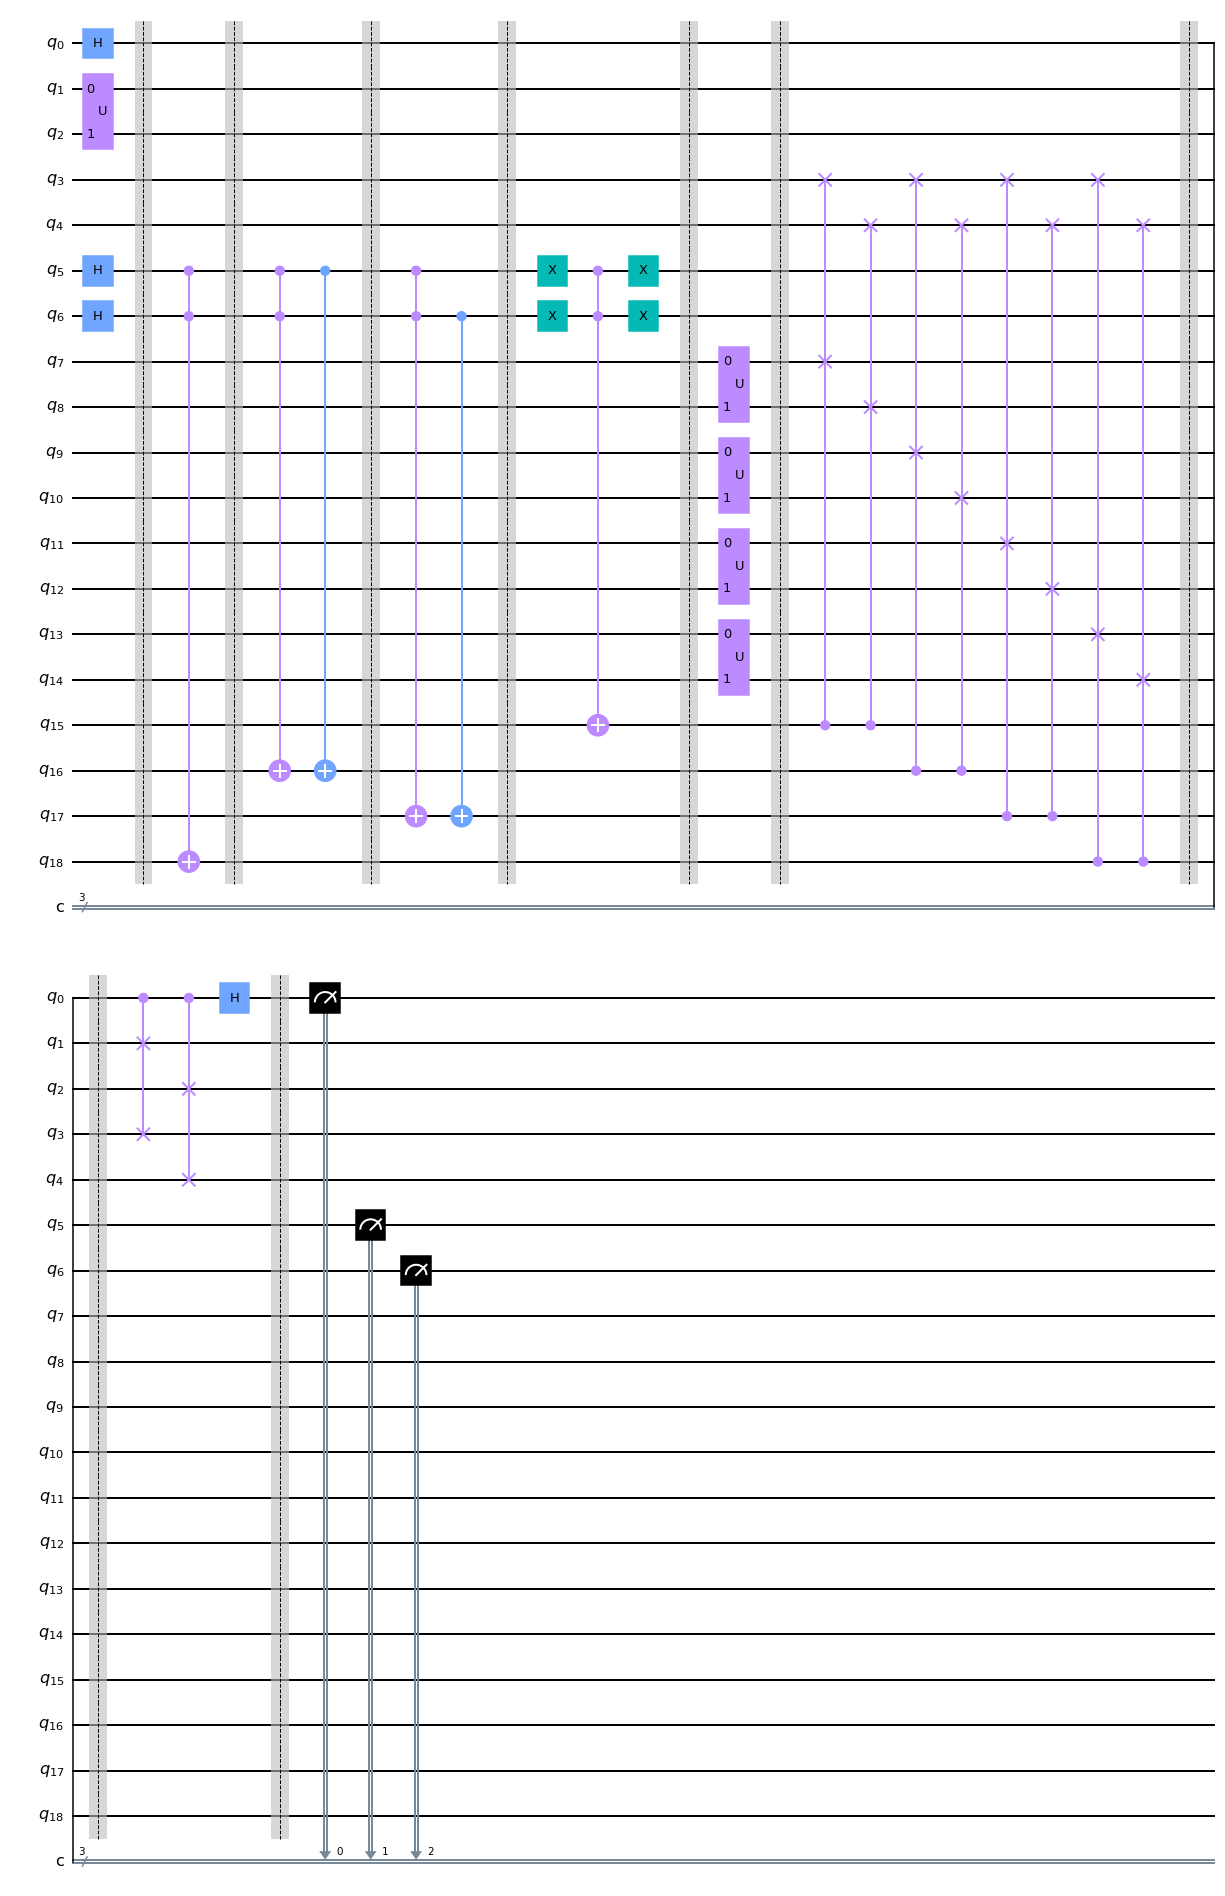

In [206]:
qc = new_c(test, gates)
qc.draw("mpl")

In [220]:
state_to_key = {'00': 0, '01': 20, '10': 30, '11': 50}

def run_experiment_with_shots(circuit, shots, verbose = True):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, aer_sim)
    qobj = assemble(transpiled_circuit)
    results = aer_sim.run(qobj, shots=shots).result()
    counts = results.get_counts()
    if verbose:
        display(plot_histogram(counts))
    return counts

def process_counts(counts, verbose = True):
    res = {}
    for k in counts.keys():
        gate_index, v, value = state_to_key[k[:2]], k[2], counts[k]
        if gate_index in res:
            d = res[gate_index]
            if v in d:
                d[v] += value
            else:
                d[v] = value
        else:
            res[gate_index] = {v: value}

    experiment_results = {}
    for k in sorted(res.keys()):
        d = res[k]
        if '1' in d:
            p = d['1']/(d['1'] + d['0'])
        else:
            p = 0
        experiment_results[k] = p
        if verbose:
            print(f"Probability of 1 in gate {k} is {p}")
    
    return experiment_results

def get_our_dictionary(gatePHI, gates, shots=50000):
    curcuit = new_c(gatePHI, gates)
    counts = run_experiment_with_shots(curcuit, shots, True)
    counts_processed = process_counts(counts)
    return counts_processed

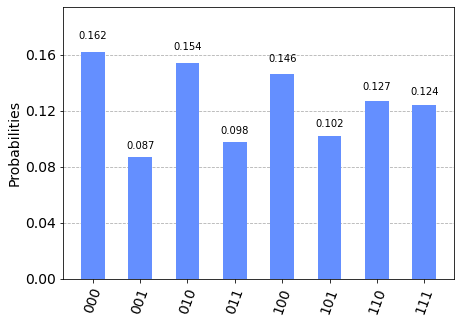

Probability of 1 in gate 0 is 0.3495614388026072
Probability of 1 in gate 20 is 0.3872299872935197
Probability of 1 in gate 30 is 0.41060935361828865
Probability of 1 in gate 50 is 0.4930721452460583


In [221]:
d = get_our_dictionary(test, gates)

In [222]:
for k, p in d.items():
    squared = 1 - 2 * p
    print(f"{k}: {squared}")

0: 0.3008771223947856
20: 0.2255400254129606
30: 0.1787812927634227
50: 0.013855709507883396


In [216]:
def get_sim(v, t):
    score = 0
    for i in range(len(v)):
        score += v[i] * t[i]
    return score * score

In [217]:
t = [0.6748709166939687, -0.20574240955712186, -0.10705803121820337, -0.7005411370233401]

In [218]:
for k, ar in some_4.items():
    print(f"{k}: {get_sim(t, ar)}")

0: 0.2954277039344752
20: 0.23755422780208924
30: 0.17343054797996485
50: 0.0005383962292008715


In [273]:
def gate_from_state(a, b):
    norm = math.sqrt(a ** 2 + b ** 2)
    x, y = a / norm, b / norm
    if y >= 0:
        theta = np.arccos(x)
    elif x <= 0 and y <= 0:
        theta = 2 * np.pi - np.arccos(x)
    elif x >= 0 and y <= 0:
        theta = 2 * np.pi - np.arccos(x)
    U = RYGate(theta * 2) 
    U = RYGate(theta * 2)
    return U

def create_gate_from_4(x, y, z, t, verbose = False):
    norm = math.sqrt(x ** 2 + y ** 2 + z ** 2 + t ** 2)
    a, c, b, d = x / norm,  y / norm, z / norm, t / norm
    if verbose:
        print(a, b, c, d)
    ab_norm = math.sqrt(a ** 2 + b ** 2)
    cd_norm = math.sqrt(c ** 2 + d ** 2)
    U_first = gate_from_state(ab_norm, cd_norm)
    U_ab = gate_from_state(a, b)
    U_ab_inverse = U_ab.inverse()
    
    U_cd = gate_from_state(c, d)
    
    qr = QuantumCircuit(1)
    qr.append(U_ab_inverse,[0])
    qr.append(U_cd,[0])
    U_ab_cd = qr.to_gate(label ="ab->cd")
    cU_ab_cd = U_ab_cd.control(1)
    
    main = QuantumCircuit(2)
    main.append(U_first, [0])
    main.append(U_ab, [1])
    main.append(cU_ab_cd, [0, 1])
    
    return main.to_gate(label = f"U")


In [274]:
def create_curcuit(testing_gate, trained_gates):
    qc = QuantumCircuit(3 + 2 + 2 + 8 + 4, 2 + 1)
    # h of the control qubit for the swap test
    qc.h([0])
    # h for the indecies
    qc.h([5,6])
    
    #  append test gate    
    qc.append(testing_gate, [1, 2])
    
    qc.barrier()
    # case 11, controls 18
    qc.ccx(5, 6, 18)
    qc.barrier()
    # case 01, controls 16
    qc.ccx(5, 6, 16)
    qc.cx(5, 16)
    qc.barrier()
    # case 10, controls 17
    qc.ccx(5, 6, 17)
    qc.cx(6, 17)
    qc.barrier()
    # case 00, controls 15     
    qc.x([5,6])
    qc.ccx(5, 6, 15)
    qc.x([5,6])
    qc.barrier()
    
    # adding the trained gates
    for i in range(4):
        qc.append(trained_gates[i], [2 * i + 7, 2 * i + 8])
    
    qc.barrier()
    # reading indecies and swapping the states
    qc.append(CSwapGate(), [15, 3, 7])
    qc.append(CSwapGate(), [15, 4, 8])

    qc.append(CSwapGate(), [16, 3, 9])
    qc.append(CSwapGate(), [16, 4, 10])
    
    qc.append(CSwapGate(), [17, 3, 11])
    qc.append(CSwapGate(), [17, 4, 12])
    
    qc.append(CSwapGate(), [18, 3, 13])
    qc.append(CSwapGate(), [18, 4, 14])
    
    qc.barrier()
    
    qc.barrier()
    qc.append(CSwapGate(), [0, 1, 3])
    qc.append(CSwapGate(), [0, 2, 4])
    qc.h(0)
    
    qc.barrier()
    qc.measure(0, 0)
    qc.measure(6, 1)
    qc.measure(5, 2)
    
    return qc

def run_experiment_with_shots(circuit, shots, verbose = True):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, aer_sim)
    qobj = assemble(transpiled_circuit)
    results = aer_sim.run(qobj, shots=shots).result()
    counts = results.get_counts()
    if verbose:
        display(plot_histogram(counts))
    return counts

def process_counts(counts, state_to_key, verbose = True):
    res = {}
    for k in counts.keys():
        gate_index, v, value = state_to_key[k[:2]], k[2], counts[k]
        if gate_index in res:
            d = res[gate_index]
            if v in d:
                d[v] += value
            else:
                d[v] = value
        else:
            res[gate_index] = {v: value}

    experiment_results = {}
    for k in sorted(res.keys()):
        d = res[k]
        if '1' in d:
            p = d['1']/(d['1'] + d['0'])
        else:
            p = 0
        experiment_results[k] = p
        if verbose:
            print(f"Probability of 1 in gate {k} is {p}")
    
    return experiment_results

def get_sim_4_vectors(test, four_vectors_with_index, shots=1024, verbose = True):
    assert(len(four_vectors_with_index) == 4)
    id0, vec0 = four_vectors_with_index[0]
    id1, vec1 = four_vectors_with_index[1]
    id2, vec2 = four_vectors_with_index[2]
    id3, vec3 = four_vectors_with_index[3]
    
    gates = list(map(lambda x: create_gate_from_4(*x), [vec0, vec1, vec2, vec3]))
    
    test_gate = create_gate_from_4(*test)
    
    state_to_key = {'00': id0, '01': id1, '10': id2, '11': id3}

    qc = create_curcuit(test_gate, gates)
    
    counts = run_experiment_with_shots(qc, shots, verbose)
    counts_processed = process_counts(counts, state_to_key, verbose)
    
    res = {}
    for k, p in counts_processed.items():
        squared = 1 - 2 * p
        res[k] = squared
    return res

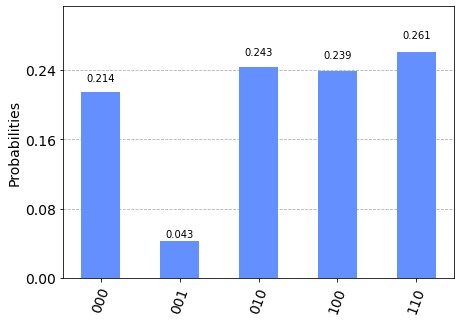

Probability of 1 in gate 0 is 0.16619183285849953
Probability of 1 in gate 50 is 0
Probability of 1 in gate 77 is 0
Probability of 1 in gate 90 is 0


{0: 0.6676163342830009, 50: 1, 77: 1, 90: 1}

In [275]:
test_vec = [0.25, 0.25, 0.25, 0.25]
trained = [(0, [0.9, 0.1, 0.3, 0.3]), (50, [0.25, 0.25, 0.25, 0.25]), (77, [0.25, 0.25, 0.25, 0.25]), (90, [0.25, 0.25, 0.25, 0.25])]


get_sim_4_vectors(test_vec, trained, shots=4096)


In [333]:
def get_sim_top4(test_vector, trained_vectors = trained_vectors, shots = 4096):
    n = (len(trained_vectors) // 4) * 4
    max_score = 0
    max_id = None
    res = []
    for i in range(0, n, 4):
        sample_trained_vectors = list(map(lambda j: (j, trained_vectors[j]), [i, i+1, i+2, i+3]))
        sims = get_sim_4_vectors(test_vector, sample_trained_vectors, shots=4096, verbose=False)
        for k, v in sims.items():
            res.append((v, k))
            if v > max_score:
                max_id = k
                max_score = v
#     print(sorted(res))
    return list(map(lambda x: x[1], sorted(res)))[-12:], max_id, max_score

In [349]:
test = [
    -0.4152618190399937,
    -0.11478313926294227,
    0.7083731852783092,
    -0.5590973823648272
]

top12_id, _, _ = get_sim_top4(test, shots = 8192)
top12 = list(map(lambda x: (x, trained_vectors[x]), top12_id))


In [350]:
print(top12_id, top12)

[54, 60, 33, 59, 42, 35, 41, 44, 49, 52, 43, 51] [(54, [-0.10105528837295824, -0.888240992379983, 0.42201322875473846, 0.15073354936337835]), (60, [-0.17149633705925368, -0.13957971322050178, 0.6679091551057106, -0.710636243487846]), (33, [-0.6910356852014252, -0.07224417529189774, 0.6393837442672075, -0.32930060504262165]), (59, [-0.19296189651066184, -0.33520503978781685, 0.743294423087229, -0.545817449705742]), (42, [-0.5751187821614137, -0.09233824020523307, 0.6871930583006893, -0.4341402266829445]), (35, [-0.5974187627904992, 0.06485231999678084, 0.6212401954916449, -0.5029369920401633]), (41, [-0.60345303148956, -0.2000791430332966, 0.7037176831379498, -0.31716588364462844]), (44, [-0.4728623239277401, 0.07582548178596774, 0.6184756886991299, -0.6230084601429741]), (49, [-0.43450244264892596, -0.42280998067234166, 0.7504094084713456, -0.2632965386283229]), (52, [-0.35507939286721246, 0.0003042228366993587, 0.6426632279055139, -0.6788980097979246]), (43, [-0.5273336367657914, 0.00

In [347]:
def process_counts(counts, state_to_key, verbose = True):
    res = {}
    for k in counts.keys():
        gate_index, v, value = state_to_key[k[:2]], k[2], counts[k]
        if gate_index in res:
            d = res[gate_index]
            if v in d:
                d[v] += value
            else:
                d[v] = value
        else:
            res[gate_index] = {v: value}

    experiment_results = {}
    for k in sorted(res.keys()):
        d = res[k]
        if '1' in d:
            p = d['1']/(d['1'] + d['0'])
        else:
            p = 0
        experiment_results[k] = p
        if verbose:
            print(f"Probability of 1 in gate {k} is {p}")
    
    return experiment_results

def get_sim_top12_do_again(test_vector, trained_vectors_tuples12, shots = 4096, verbose = False):
    max_score = 0
    max_id = None

    test_gate = create_gate_from_4(*test_vector)
    
    res = {}
    
    for j in range(0, 12, 4):
        sample_trained_vectors = trained_vectors_tuples12[j: j + 4]
        sims = get_sim_4_vectors(test_vector, sample_trained_vectors, shots=50000, verbose=False)
        print(sims)

In [348]:
get_sim_top12_do_again(test, top12, True)

{114: 0.9408112249012176, 132: 0.9116434010152284, 134: 0.9746815286624204, 143: 0.9956560212372295}
{106: 0.9080645161290323, 116: 0.9643589339220943, 123: 0.9492124718739955, 133: 0.9544652877986212}
{113: 0.9439834024896265, 115: 0.5404577691811734, 124: 0.9875687305761415, 126: 0.9936056270481975}
